<a href="https://colab.research.google.com/github/HChandeepa/Lung_Sound_Classification_System/blob/Master/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Corresponding normalized folders
normalized_folders = [
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Healthy Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized'
]

In [ ]:
# Mapping each folder to a class label
labels = {
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized': 1,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized': 2,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized': 3,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized': 4,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized': 5,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized': 6,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized': 7,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized': 8
}


In [ ]:
# Feature extraction parameters
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set a fixed length for all audio samples

# Function to extract features from an audio file
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)
    return features_3d

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Feature extraction parameters
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set a fixed length for all audio samples

# Define folder paths and labels
folder_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized'
]
labels = {path: idx for idx, path in enumerate(folder_paths)}

# Feature extraction function
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)
    return features_3d

# Load and preprocess the data
all_features = []
all_labels = []
for folder in folder_paths:
    for filename in os.listdir(folder):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder, filename)
            features_3d = extract_features(file_path)
            all_features.append(features_3d)
            all_labels.append(labels[folder])

# Convert to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Load ensemble models
hybrid_model = load_model('lung_sound_Hybrid_multiclass_classification_model.h5')
cnn_model = load_model('lung_sound_multiclass_classification_model.h5')

# Define ensemble weights
weight_hybrid = 0.6
weight_cnn = 0.4

# Function to perform ensemble prediction with weighted average
def weighted_average_ensemble(input_data, weight_hybrid, weight_cnn):
    # Get predictions from both models
    hybrid_pred = hybrid_model.predict(input_data)
    cnn_pred = cnn_model.predict(input_data)

    # Weighted average ensemble
    ensemble_pred = (weight_hybrid * hybrid_pred) + (weight_cnn * cnn_pred)

    # Get the final class prediction (index of the highest probability)
    final_class_pred = np.argmax(ensemble_pred, axis=1)
    return final_class_pred

# Generate ensemble predictions for the test set
ensemble_preds = []
for i in range(X_test.shape[0]):
    input_data = np.expand_dims(X_test[i], axis=0)  # Ensure correct shape for model input
    final_class_pred = weighted_average_ensemble(input_data, weight_hybrid, weight_cnn)
    ensemble_preds.append(final_class_pred[0])  # Extract the single element

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")

# Additional Metrics
print("Classification Report:\n", classification_report(y_test, ensemble_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, ensemble_preds))


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━

In [ ]:
# Assuming your models have been compiled with the appropriate loss function and optimizer
history_hybrid = hybrid_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)
history_cnn = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50


ValueError: Unknown variable: <KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=sequential/conv2d/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

Ensemble Model Accuracy: 86.11%
Classification Report:
                   precision    recall  f1-score   support

          Asthma       0.71      0.80      0.75        40
  Bronchiectasis       0.93      0.97      0.95        40
   Bronchiolitis       0.84      0.90      0.87        40
      Bronchitis       1.00      0.95      0.97        40
            COPD       0.86      0.78      0.82        40
   Lung Fibrosis       0.95      0.88      0.91        40
Pleural Effusion       1.00      0.95      0.97        40
       Pneumonia       0.74      0.70      0.72        40
            URTI       0.77      0.82      0.80        40

        accuracy                           0.86       360
       macro avg       0.87      0.86      0.86       360
    weighted avg       0.87      0.86      0.86       360



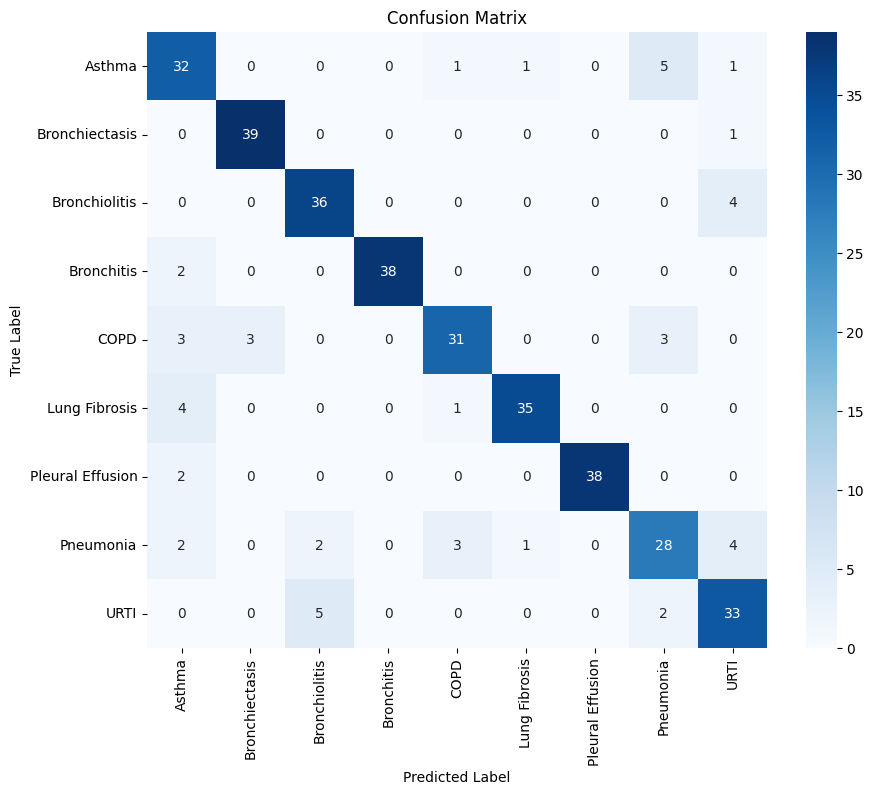

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update labels as numbers
labels = {
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized': 1,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized': 2,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized': 3,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized': 4,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized': 5,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized': 6,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized': 7,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized': 8
}

# Class names for display
class_names = [
    'Asthma', 'Bronchiectasis', 'Bronchiolitis', 'Bronchitis',
    'COPD', 'Lung Fibrosis', 'Pleural Effusion', 'Pneumonia', 'URTI'
]

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")

# Print classification report
class_report = classification_report(y_test, ensemble_preds, target_names=class_names)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf

class EnsembleModel(tf.keras.Model):
    def __init__(self, hybrid_model_path, cnn_model_path, weight_hybrid=0.6, weight_cnn=0.4):
        super(EnsembleModel, self).__init__()
        # Load each individual model
        self.hybrid_model = load_model(hybrid_model_path)
        self.cnn_model = load_model(cnn_model_path)
        # Set the ensemble weights
        self.weight_hybrid = weight_hybrid
        self.weight_cnn = weight_cnn

    def call(self, inputs):
        # Get predictions from each model
        hybrid_pred = self.hybrid_model(inputs)
        cnn_pred = self.cnn_model(inputs)
        # Compute the weighted average of predictions
        ensemble_pred = (self.weight_hybrid * hybrid_pred) + (self.weight_cnn * cnn_pred)
        return ensemble_pred

# Instantiate the EnsembleModel with your model paths
ensemble_model = EnsembleModel(
    hybrid_model_path='lung_sound_Hybrid_multiclass_classification_model.h5',
    cnn_model_path='lung_sound_multiclass_classification_model.h5'
)

In [ ]:
ensemble_model.save('ensemble_model.h5')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load models
hybrid_model = load_model('lung_sound_multiclass_classification_Hybrid_model.h5')
base_model = load_model('lung_sound_multiclass_classification_model.h5')

# Assign weights for ensemble (adjust weights as needed)
weight_hybrid = 0.6  # Weight for hybrid model
weight_base = 0.4    # Weight for base model

# Function to perform weighted average ensemble
def weighted_average_ensemble(input_data, weight_hybrid, weight_base):
    # Get predictions from both models
    hybrid_pred = hybrid_model.predict(input_data)
    base_pred = base_model.predict(input_data)

    # Apply weighted average
    ensemble_pred = (weight_hybrid * hybrid_pred) + (weight_base * base_pred)

    # Get the final class prediction (index of the highest probability)
    final_class_pred = np.argmax(ensemble_pred, axis=1)
    return ensemble_pred, final_class_pred

# Load and preprocess a sample input data
sample_file = '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized/normalized_113_1b1_Al_sc_Litt3200_segment_0.wav'
input_data = extract_features(sample_file)  # Replace with actual feature extraction logic
input_data = np.expand_dims(input_data, axis=0)  # Ensure correct shape for model input

# Perform weighted average ensemble prediction
ensemble_pred, final_class_pred = weighted_average_ensemble(input_data, weight_hybrid, weight_base)

# Print the ensemble prediction probabilities and final predicted class
print("Ensemble Prediction Probabilities:", ensemble_pred)
print("Final Predicted Class:", final_class_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Ensemble Prediction Probabilities: [[0.35157898 0.00484637 0.00079073 0.02033119 0.4789333  0.01885059
  0.00618665 0.10686304 0.01161918]]
Final Predicted Class: [4]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load models
hybrid_model = load_model('lung_sound_multiclass_classification_Hybrid_model.h5')
base_model = load_model('lung_sound_multiclass_classification_model.h5')

# Assign weights for ensemble
weight_hybrid = 0.6  # Weight for hybrid model
weight_base = 0.4    # Weight for base model

# Mapping of labels to disease names
labels = {
    0: 'Asthma',
    1: 'Bronchiectasis',
    2: 'Bronchiolitis',
    3: 'Bronchitis',
    4: 'COPD',
    5: 'Lung Fibrosis',
    6: 'Pleural Effusion',
    7: 'Pneumonia',
    8: 'URTI'
}

# Function to perform weighted average ensemble and display results
def weighted_average_ensemble(input_data, weight_hybrid, weight_base):
    # Get predictions from both models
    hybrid_pred = hybrid_model.predict(input_data)
    base_pred = base_model.predict(input_data)

    # Apply weighted average
    ensemble_pred = (weight_hybrid * hybrid_pred) + (weight_base * base_pred)

    # Get the final class prediction (index of the highest probability)
    final_class_pred = np.argmax(ensemble_pred, axis=1)[0]

    # Display disease names and probabilities
    print("Prediction probabilities for each disease:")
    for i, prob in enumerate(ensemble_pred[0]):
        print(f"{labels[i]}: {prob * 100:.2f}%")

    # Display the final predicted disease name and its percentage
    predicted_disease = labels[final_class_pred]
    predicted_percentage = ensemble_pred[0][final_class_pred] * 100
    print(f"\nFinal Predicted Disease: {predicted_disease} ({predicted_percentage:.2f}%)")

# Load and preprocess a sample input data
sample_file = '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized/normalized_BP1_Asthma,I E W,P L L,70,M_segment_3.wav'
input_data = extract_features(sample_file)  # Replace with actual feature extraction logic
input_data = np.expand_dims(input_data, axis=0)  # Ensure correct shape for model input

# Perform weighted average ensemble prediction and display results
weighted_average_ensemble(input_data, weight_hybrid, weight_base)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Prediction probabilities for each disease:
Asthma: 79.39%
Bronchiectasis: 0.06%
Bronchiolitis: 0.02%
Bronchitis: 6.68%
COPD: 1.12%
Lung Fibrosis: 6.30%
Pleural Effusion: 0.71%
Pneumonia: 5.46%
URTI: 0.27%

Final Predicted Disease: Asthma (79.39%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


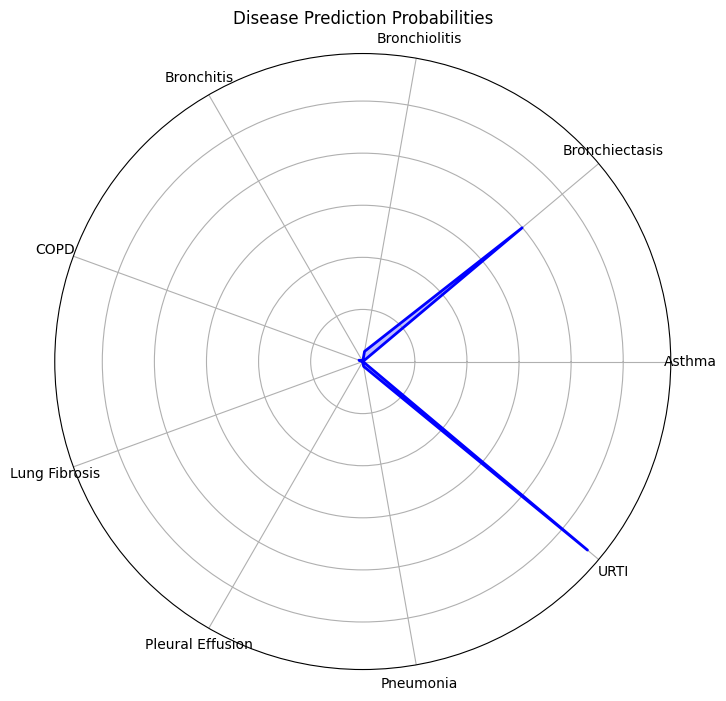

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from math import pi

# Load models
hybrid_model = load_model('lung_sound_multiclass_classification_Hybrid_model.h5')
base_model = load_model('lung_sound_multiclass_classification_model.h5')

# Assign weights for ensemble
weight_hybrid = 0.6
weight_base = 0.4

# Mapping labels to disease names
labels = {
    0: 'Asthma',
    1: 'Bronchiectasis',
    2: 'Bronchiolitis',
    3: 'Bronchitis',
    4: 'COPD',
    5: 'Lung Fibrosis',
    6: 'Pleural Effusion',
    7: 'Pneumonia',
    8: 'URTI'
}

# Function for weighted average ensemble prediction
def weighted_average_ensemble(input_data, weight_hybrid, weight_base):
    hybrid_pred = hybrid_model.predict(input_data)
    base_pred = base_model.predict(input_data)
    ensemble_pred = (weight_hybrid * hybrid_pred) + (weight_base * base_pred)
    return ensemble_pred[0]  # Return the probabilities for each class

# Visualization - Radar Chart of Prediction Probabilities
def plot_radar_chart(probabilities, labels):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    probabilities = np.concatenate((probabilities, [probabilities[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, probabilities, color='blue', alpha=0.25)
    ax.plot(angles, probabilities, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    plt.title("Disease Prediction Probabilities")
    plt.show()

# Load and preprocess a sample input data
sample_file = '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis/111_1b2_Tc_sc_Meditron_segment_1_aug119.wav'
input_data = extract_features(sample_file)  # Replace with actual feature extraction
input_data = np.expand_dims(input_data, axis=0)

# Perform ensemble prediction
ensemble_probs = weighted_average_ensemble(input_data, weight_hybrid, weight_base)

# Display radar chart
plot_radar_chart(ensemble_probs, list(labels.values()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


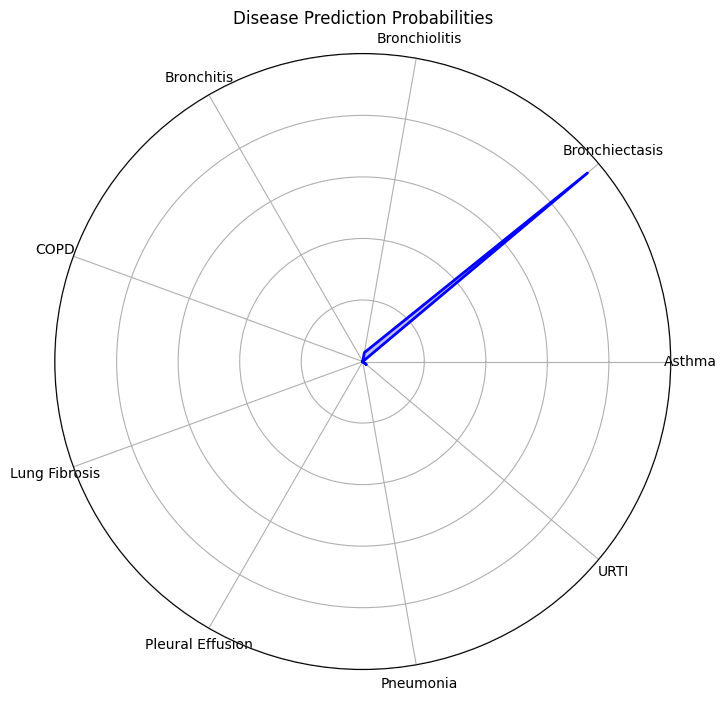

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from math import pi

# Load models
hybrid_model = load_model('lung_sound_multiclass_classification_Hybrid_model.h5')
base_model = load_model('lung_sound_multiclass_classification_model.h5')

# Assign weights for ensemble
weight_hybrid = 0.6
weight_base = 0.4

# Mapping labels to disease names
labels = {
    0: 'Asthma',
    1: 'Bronchiectasis',
    2: 'Bronchiolitis',
    3: 'Bronchitis',
    4: 'COPD',
    5: 'Lung Fibrosis',
    6: 'Pleural Effusion',
    7: 'Pneumonia',
    8: 'URTI'
}

# Function for weighted average ensemble prediction
def weighted_average_ensemble(input_data, weight_hybrid, weight_base):
    hybrid_pred = hybrid_model.predict(input_data)
    base_pred = base_model.predict(input_data)
    ensemble_pred = (weight_hybrid * hybrid_pred) + (weight_base * base_pred)
    return ensemble_pred[0]  # Return the probabilities for each class

# Visualization - Radar Chart of Prediction Probabilities
def plot_radar_chart(probabilities, labels):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    probabilities = np.concatenate((probabilities, [probabilities[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, probabilities, color='blue', alpha=0.25)
    ax.plot(angles, probabilities, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    plt.title("Disease Prediction Probabilities")
    plt.show()

# Load and preprocess a sample input data
sample_file = '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized/normalized_169_1b1_Lr_sc_Meditron_segment_3_aug77.wav'
input_data = extract_features(sample_file)  # Replace with actual feature extraction
input_data = np.expand_dims(input_data, axis=0)

# Perform ensemble prediction
ensemble_probs = weighted_average_ensemble(input_data, weight_hybrid, weight_base)

# Display radar chart
plot_radar_chart(ensemble_probs, list(labels.values()))